
# 页面切换优化
页面切换的性能影响用户操作的连贯性和流畅度，是小程序运行时性能的一个重要组成部分。


## 1. 页面切换的流程
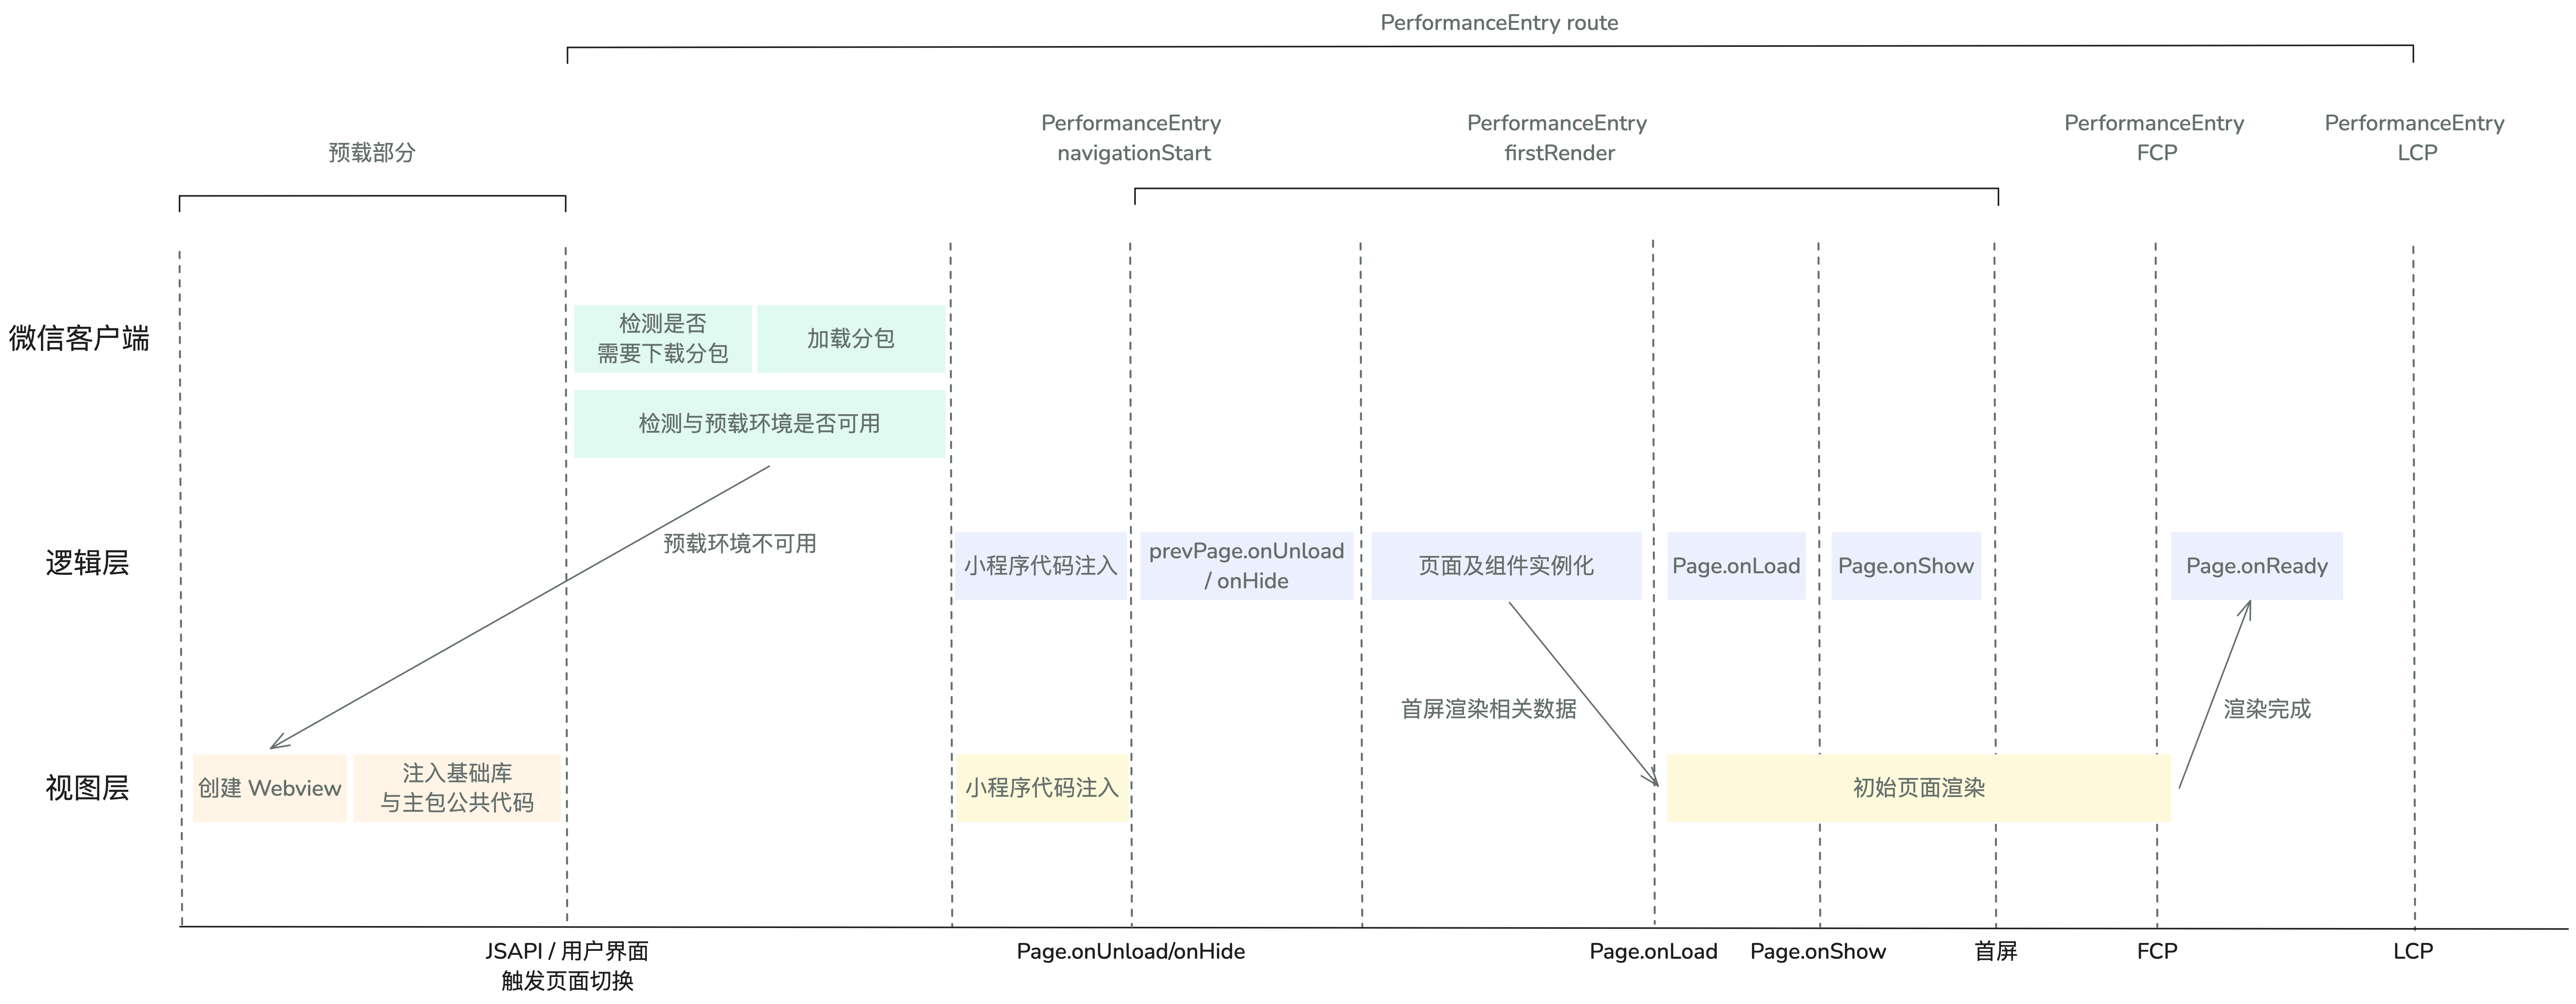

### 1.1 触发页面切换
### 1.2 加载分包（若有）
如果页面切换的目标页面在分包中，页面切换时需要下载分包，并在逻辑层注入执行分包内的 JS 代码。
小程序生命周期内，每个分包只会在逻辑层注入一次。

### 1.3 视图层页面初始化

小程序视图层的每个页面都是由独立的 WebView 渲染的，因此页面切换时需要一个新的 WebView 环境。视图层页面初始化主要会做以下事情：

- 创建 WebView
- 注入视图层的小程序基础库
- 注入主包的公共代码（独立分包除外）
- （若页面位于分包中）注入分包的公共代码
- 注入页面代码

为了降低视图层页面初始化的耗时，在页面渲染完成后，通常会进行必要的预加载供页面切换时使用。预加载主要会做以下事情：

- 创建 WebView
- 注入视图层的小程序基础库
- 注入主包的公共代码（若主包已在本地）
>如果页面切换过快，或预加载的环境被回收，则需要在页面切换时重新创建环境。

如果页面切换时有预加载好的环境，可以大大降低页面切换的耗时。

> 当切换的目标页面已加载完成时，不需要进行本阶段。

### 1.4 逻辑层页面初始化
### 1.5 目标页面渲染
### 1.6 页面切换动画


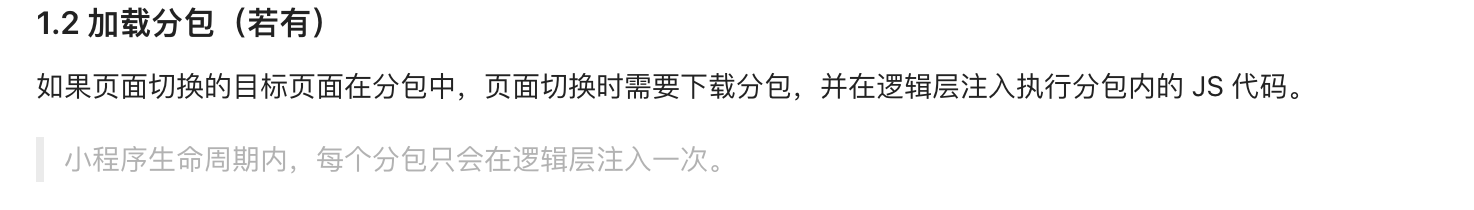





## 2. 如何优化页面切换
### 2.1 避免在 onHide/onUnload 执行耗时操作
页面切换时，会先调用前一个页面的 onHide 或 onUnload 生命周期，然后再进行新页面的创建和渲染。如果 onHide 和 onUnload 执行过久，可能导致页面切换的延迟。

✅ onHide/onUnload 中的逻辑应尽量简单，若必须要进行部分复杂逻辑，可以考虑用 setTimeout 延迟进行。
❌ 减少或避免在 onHide/onUnload 中执行耗时逻辑，如同步接口调用、setData 等。


### 2.2 首屏渲染优化
页面首屏渲染是页面切换耗时的重要组成部分，优化手段可以参考启动性能优化中首屏渲染优化部分。


### 2.3 提前发起数据请求

### 2.4 控制预加载下个页面的时机
避免预加载流程对页面加载过程的影响，开发者可以配置 handleWebviewPreload 选项，来控制预加载下个页面的时机。

handleWebviewPreload 有以下取值

static: 默认值。在当前页面 onReady 触发 200ms 后触发预加载。
auto: 渲染线程空闲时进行预加载。由基础库根据一段时间内 requestAnimationFrame 的触发频率算法判断。
manual: 由开发者通过调用 wx.preloadWebview 触发。开发者可以在页面主要内容的 setData 结束后手动触发。
